In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sb



from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import nltk
nltk.download('stopwords')
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [4]:
data.describe()


,label
count,5000.000000
mean,0.501000
std,0.500049
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
data.shape

(5000, 2)

In [6]:
#processing message

def processing(text):
    
    #removal of email addressess with 'emailaddr'
    raw_text = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b'," ",text)
     #removal of URLs with HTTPADDR
    raw_text=re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)' ," ",raw_text)

#removal of non letters
    raw_text=re.sub("[^a-zA-Z]"," ",raw_text)
#removal of numbers
    raw_text=re.sub('\d+(\.\d+)?'," ",raw_text)

    words=raw_text.lower().split()

    stop = set(stopwords.words("english"))
    meaningful_words=[ps.stem(w) for w in words if not w in stop]
    return (" ".join(meaningful_words))







In [7]:
clean_text_corpus=[]

In [8]:
ps =PorterStemmer()


In [9]:
text_count=data['text'].size
text_count

5000

In [10]:
for i in range(0,text_count):
    clean_text_corpus.append(processing(data["text"][i]))

In [11]:
data["text"][0]

'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lightho

In [41]:
 clean_text_corpus[0]

'alway wrote seri complet stink fest jim belushi involv heavili one day tragic happenst occur white sox game end realiz remot way side room somehow could gotten walk across room get remot even tv turn channel get walk across countri watch tv anoth state nut said decid hang tight couch take whatev fate store fate store episod show episod rememb littl except made broad gener sweep blanket judgment base zero object experienti evid noth whatsoev back opinion complet right show total crud pie belushi comed deliveri hairi lighthous foghorn women physic attract stepford elicit real feel viewer absolut reason stop run local tv station gasolin flamethrow send everi copi mutt howl back hell br br except br br except wonder comic sti ling larri joe campbel america greatest comic charact actor guy play belushi brother law andi gold good realli well asid funni job make belushi look good like tri make butt wart look good campbel pull style someon invent nobel prize comic buffooneri win everi year wi

In [43]:
clean_text_corpus[1]


'st watch dir steve purcel typic mari kate ashley fare kiss look like girl get pretti tire stuff interest happen ever decid split go way episod adventur intern rome fashion design put right mailroom learn work hard guess besid typic flirtat boy noth much els except rome scenario way movi final reveal get fire hire fire hire definetli made peopl understand corpor world show interpret mayb real world next adventur one even kid seem care bore adventur make believ let see probabl coupl year till legal adult see happen'

In [44]:
data["text"][1]

"1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have 

In [13]:
cv = CountVectorizer()
data_input = cv.fit_transform( clean_text_corpus)
data_input = data_input.toarray()

In [14]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
#creating wordcloud
!pip install wordcloud

from wordcloud import WordCloud , STOPWORDS

In [22]:
stopwords = set(STOPWORDS)

In [26]:
def show_wordcloud(data, title= None):
    wordcloud=WordCloud(background_color = 'black', stopwords = stopwords ,max_words =200,max_font_size = 40 ,scale =3,random_state  =1).generate(str(data))
    
    fig = plt.figure(1,figsize=(15,15))
    plt.axis("off")
    
    if title:
        fig.suptitle(title,fontsize =20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

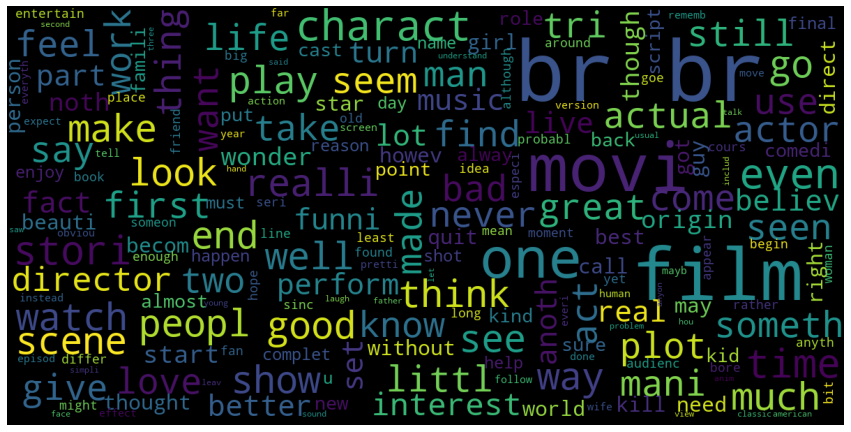

In [27]:
show_wordcloud(clean_text_corpus)

In [ ]:
#applying classification

In [29]:
data_output =data['label']

<AxesSubplot:>

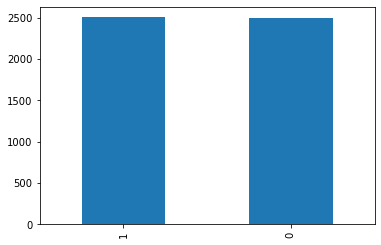

In [31]:
data_output.value_counts().plot.bar()

In [34]:
from sklearn.model_selection  import train_test_split
train_x,test_x,train_y,test_y =train_test_split(data_input,data_output,test_size=0.20,random_state=0)

In [36]:
#training
model_nvb=GaussianNB()
model_nvb.fit(train_x,train_y)
model_rf = RandomForestClassifier(n_estimators=1000,random_state=0)
model_rf.fit(train_x,train_y)
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [37]:
prediction_nvb=model_nvb.predict(test_x)
prediction_rf=model_rf.predict(test_x)
prediction_dt=model_dt.predict(test_x)

In [38]:
#result naive bayes

print("Accuracy for Naive Bayes : %0.5f \n\n" % accuracy_score(test_y,prediction_nvb))
print("classification report naive bayes: \n",classification_report(test_y,prediction_nvb))

Accuracy for Naive Bayes : 0.62100 


classification report naive bayes: 
               precision    recall  f1-score   support

           0       0.60      0.70      0.64       489
           1       0.65      0.55      0.60       511

    accuracy                           0.62      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



In [39]:
#result decision tree
print("Accuracy for Decision tree : %0.5f \n\n" % accuracy_score(test_y,prediction_dt))
print("classification report Decision tree: \n",classification_report(test_y,prediction_dt))

Accuracy for Decision tree : 0.68700 


classification report Decision tree: 
               precision    recall  f1-score   support

           0       0.68      0.67      0.68       489
           1       0.69      0.71      0.70       511

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [40]:
#result random forest
print("Accuracy for random forest : %0.5f \n\n" % accuracy_score(test_y,prediction_rf))
print("classification report random forest: \n",classification_report(test_y,prediction_rf))

Accuracy for random forest : 0.84500 


classification report random forest: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       489
           1       0.83      0.88      0.85       511

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

